# Prepare and save HOG features

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from skimage.transform import resize
from skimage.feature import hog

In [2]:
# Create the database of true BB (positives)

CF = pd.read_csv('Clip_files.csv', header = None)
CF = CF.to_numpy()

if 'DataHOG' in locals():
    del DataHOG

for i in range(len(CF)):
    im = mpimg.imread(CF[i][0]) # read clip
    gim = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert to grey
    fd = hog(gim, orientations=9, pixels_per_cell=(8, 8), \
            cells_per_block=(1, 1), multichannel=False)

    fd = np.reshape(fd,(1,-1))
    if 'DataHOG' in locals():
        DataHOG = np.append(DataHOG,fd,axis = 0)
    else:
        DataHOG = fd
        
print(DataHOG.shape)


(2992, 135)


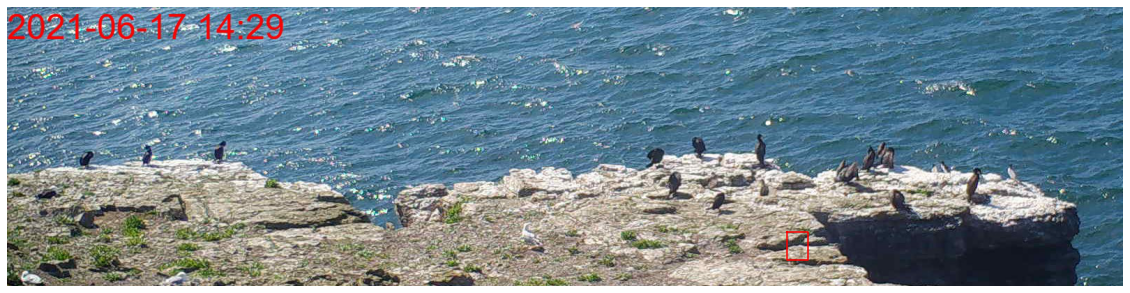

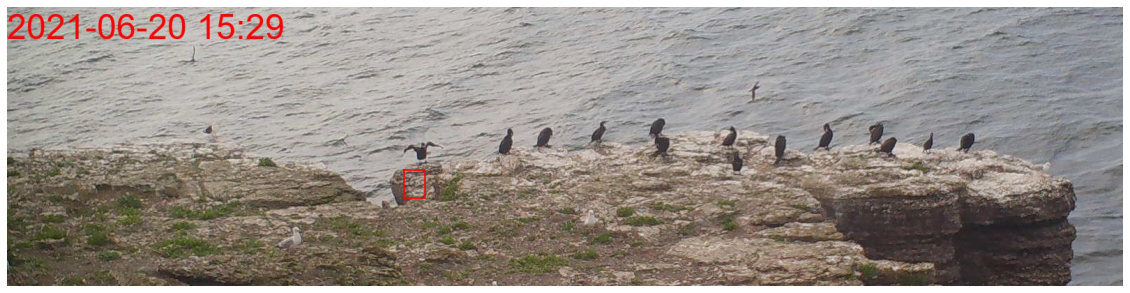

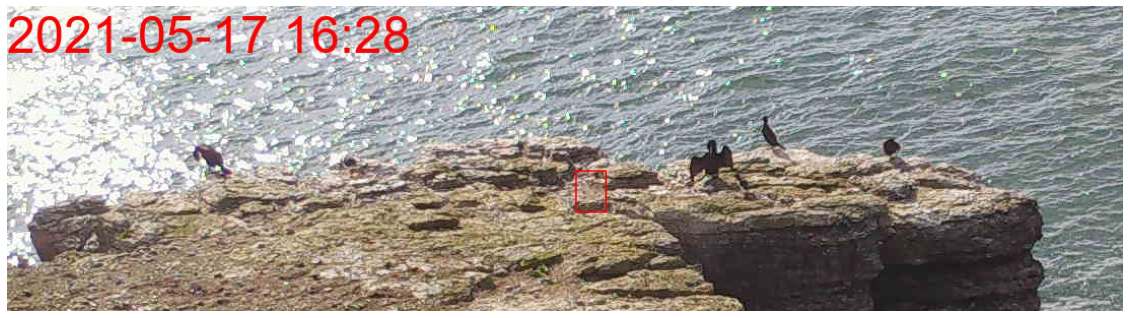

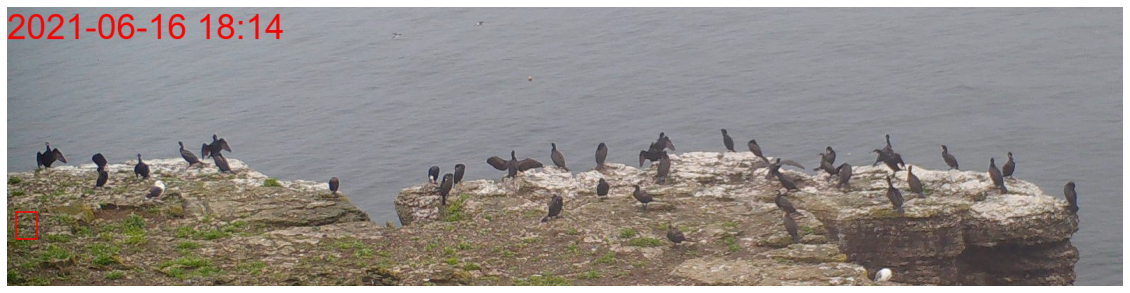

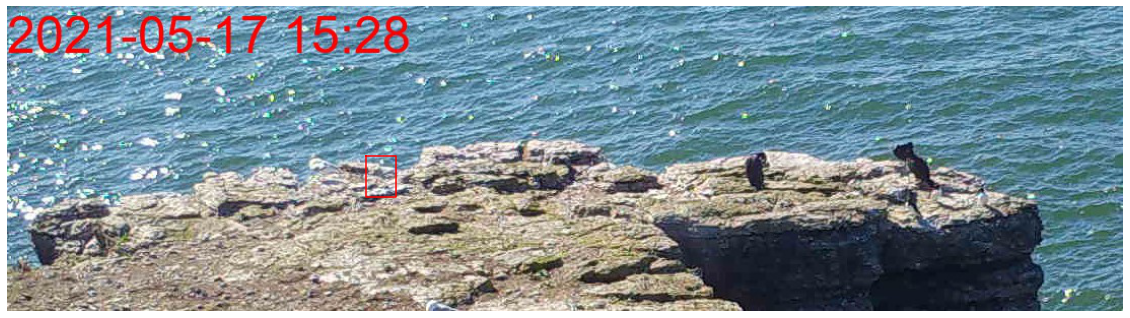

(8976, 135)


In [3]:
# Add random BBs (negatives)
N = len(DataHOG)*2 # number of negatives

BB = pd.read_csv('Overall_BB.csv', header = None)
BB = BB.to_numpy()

# Here we use the bottom part (3/4) of the image for the negative examples.

# Crop a precpecified area
width = 30; height = 40

for i in range(N):
    
    # Pick a random image
    im_index = np.random.randint(len(BB), dtype=int)
  
    im2 = mpimg.imread(BB[im_index,5]) # read image
    im = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY) # convert to grey
    
    # Pick a random point in the range of interest to be the centre of a negative example
    cx = np.random.randint(low = width/2, high = im.shape[1]-width/2, dtype=int)
    cy = np.random.randint(low = im.shape[0]*0.25+height/2, high = im.shape[0]-height/2, dtype=int)
    row_start = np.round(cy-height/2).astype(int)
    row_end = np.round(row_start+height).astype(int)
    col_start = np.round(cx-width/2).astype(int)
    col_end = np.round(col_start+width).astype(int)                                 
    neg_clip = im[row_start:row_end,col_start:col_end]

    if i <=4:
        plt.figure(figsize=(20,10))
        plt.imshow(im2)
        plt.axis('Off')
        plt.plot([col_start,col_start,col_end,col_end,col_start],[row_start,row_end,row_end,row_start,row_start],'r-')
        plt.show()
    
    fd = hog(neg_clip, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), multichannel=False)
    neg_data_row  = np.reshape(fd,(1,-1))

    DataHOG = np.append(DataHOG,neg_data_row,axis = 0)

print(DataHOG.shape)
    

In [4]:
# Save the HOG data
np.savetxt("ClipsHOG.csv", DataHOG, delimiter=",")  
# Note: Even though the negative clips are different, the Labels are the same